<a href="https://colab.research.google.com/github/Vedantshah0610/Machine-learning/blob/master/machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np 
import pandas as pd
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('/content/machine_learning.csv')
df = dataset
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Data Visualizations

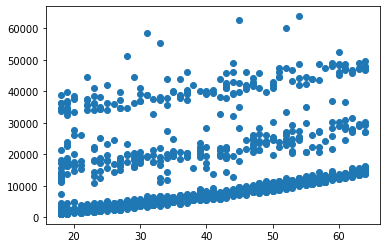

In [ ]:
age = df["age"]
plt.scatter(age,charges)

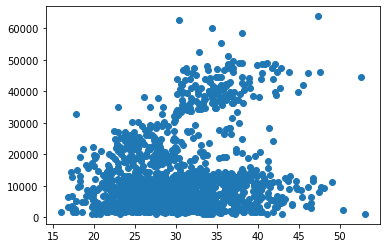

In [ ]:
bmi = df["bmi"]
plt.scatter(bmi,charges)

In [ ]:
smoker = list(df['smoker'])
smoker =list(map(lambda x:1 if x == "yes" else 0,smoker))
#plt.scatterplot)
charges = list(df["charges"])

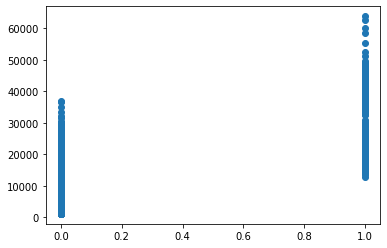

In [ ]:
plt.scatter(smoker,charges)

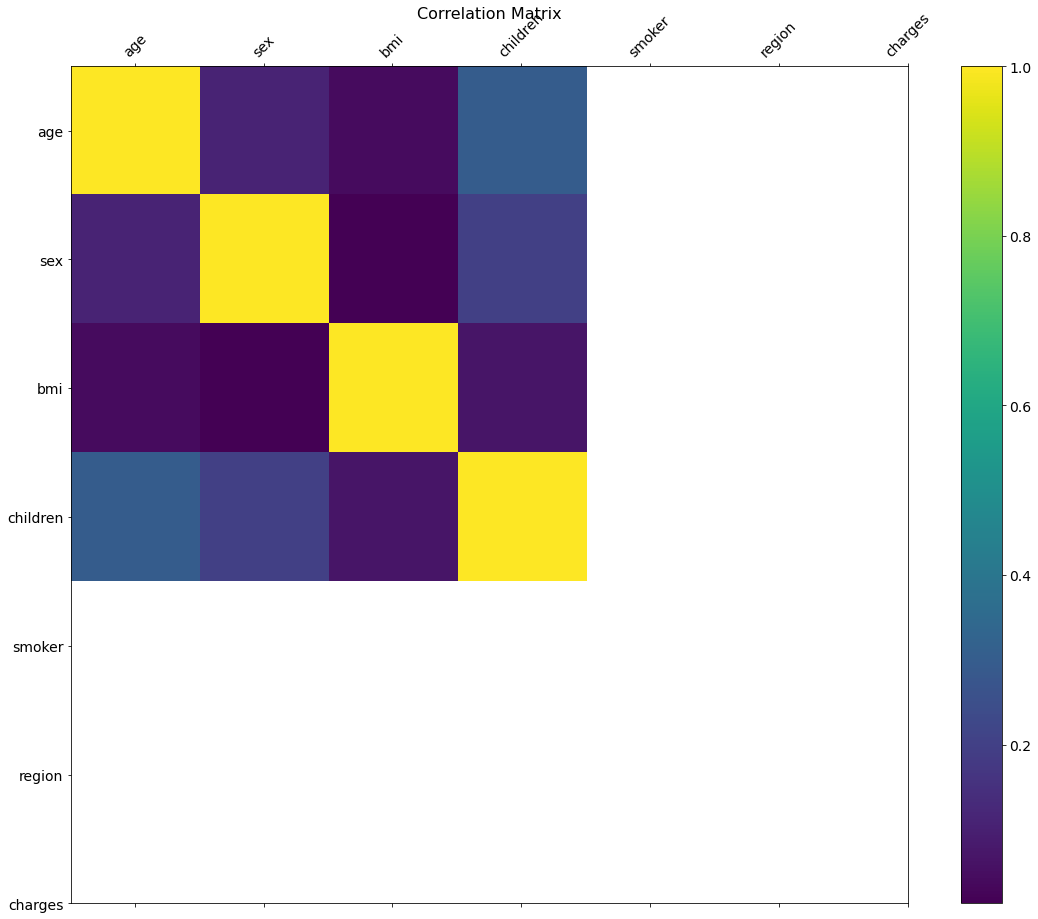

In [ ]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [ ]:
#X = dataset.iloc[:,1:6].values
#y = dataset.iloc[:,6].values
z=dataset.iloc[2]

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
#y1 = encoder.fit_transform(z)
df['sex'] = df['sex'].apply({'male':0,'female':1}.get) 
df['smoker'] = df['smoker'].apply({'yes':1, 'no':0}.get)
df['region'] = df['region'].apply({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4}.get)

#gender=encoder.fit_transform(df['sex'])
#smoker=encoder.fit_transform(df['smoker'])
#region=encoder.fit_transform(df['region'])
#print(gender)
#print(smoker)
#print(region)
#df['smoker']=smoker
#df['sex']=gender
#df['region']=region
#X = dataset.iloc[:,1:6].values
#y = dataset.iloc[:,6].values
X = df[['age', 'sex', 'bmi', 'children','smoker','region']]
y = df['charges']
#print(y)
#Y = pd.get_dummies(y1).values
#print(y1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=2)
print(X_test)
#, gender_train,gender_test,smoker_train,smoker_test,region_train,region_test

      age  sex     bmi  children  smoker  region
17     23    0  23.845         0       0       4
1091   55    1  29.830         0       0       4
273    50    0  27.455         1       0       4
270    18    0  29.370         1       0       2
874    44    0  21.850         3       0       4
...   ...  ...     ...       ...     ...     ...
232    19    1  17.800         0       0       1
323    57    0  40.945         0       0       4
1337   61    1  29.070         0       1       3
1066   48    0  37.290         2       0       2
966    51    0  24.795         2       1       3

[268 rows x 6 columns]


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers  import SGD, Adam

model = Sequential()
model.add(Dense(10, input_shape=(6,), activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='softmax'))
model.compile(Adam(lr=0.04), loss='categorical_crossentropy', metrics=['accuracy'])

'''model.add(Dense(6, input_shape=(6,), activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(3, activation='softmax'))
model.add(Dense(1, activation='softmax'))

model.compile(Adam(lr=0.04), 'categorical_crossentropy', metrics=['accuracy'])'''

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 10)                70        
_________________________________________________________________
dense_16 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_17 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_18 (Dense)             (None, 3)                 33        
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 4         
Total params: 327
Trainable params: 327
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print(X_train)
print("-----------")
#print(gender_train)
#print(smoker_train)
#print(region_train)

      age  sex     bmi  children  smoker  region
882    21    1  22.135         0       0       4
505    37    0  30.875         3       0       3
798    58    1  33.100         0       0       1
792    22    1  23.180         0       0       4
201    48    1  32.230         1       0       2
...   ...  ...     ...       ...     ...     ...
466    60    1  28.700         1       0       1
299    48    1  28.880         1       0       3
493    61    0  43.400         0       0       1
527    51    1  25.800         1       0       1
1192   58    1  32.395         1       0       4

[1070 rows x 6 columns]
-----------


In [ ]:
model.fit(X_train,y_train,epochs = 100)
#y_pred=model.predict(X_test)
y_pred=model.predict(X_test)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 3/100
34/34 [==============================] - 0s 972us/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 6/100
34/34 [==============================] - 0s 978us/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 8/100
34/34 [==============================] - 0s 972us/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 9/100
34/34 [==============================] - 0s 976us/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 10/100
34/34 [=========